* **Name :- Adnan Baig**
* **Batch :- 251 & Ai-Elite-16**
* **Text Data Preprocessing , Bag of Words Vectorization , Text Data Visualization**

#### Importing Required Liabraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import emoji
import textblob
import re
import autocorrect
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer , LancasterStemmer , SnowballStemmer , WordNetLemmatizer
from nltk.tokenize import word_tokenize , sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

#### Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\restaurant_reviews.csv")
df

,Review
0,An exceptional dining experience! The flavors ...
1,The menu is a symphony of flavors that take yo...
2,"From appetizers to desserts, the balance of fl..."
3,"The ambiance is charming, and the food is noth..."
4,This restaurant is a hidden gem! The dishes ar...
5,A feast for the senses! The flavors were bold ...
6,The fusion of different cuisines is done seaml...
7,This restaurant not only serves delectable dis...
8,"As a vegan, I'm thrilled to have found a resta..."
9,The cozy atmosphere of this restaurant adds to...


#### Text Data Preprocessing

In [3]:
def eda(data):
    count = 0 
    count = data.apply(lambda x: count + emoji.emoji_count(x)).sum()
    lower = data.str.islower().sum()
    url = data.apply(lambda x: True if re.search(r'https?:\S+| www.\S+',x) else False).sum()
    tags = data.apply(lambda x: True if re.search(r'<[^>]+>',x) else False).sum()
    punctuation = data.apply(lambda x: True if re.search(r'[^a-zA-Z0-9]',x) else False).sum()
    digits = data.apply(lambda x: True if re.search(r'[0-9]',x) else False).sum()

    return pd.Series({'Emoji':count,'Lower_case':lower,"Urls":url,'Tags':tags,'Punctuation':punctuation,'Digits':digits})

In [4]:
eda(df.Review)

Emoji           0
Lower_case      0
Urls            0
Tags            0
Punctuation    20
Digits          0
dtype: int64

In [5]:
def text_pre(x):
    spell = autocorrect.Speller()    #Object for spelling correction
    porter = PorterStemmer()
    x = x.lower()   #Converting entire text into lowercase
    spell.autocorrect_sentence(x)   #Spelling Correction
    x = re.sub(r'[^a-zA-Z0-9]' ,' ', x)   #REmoving Punctuation marks
    x = word_tokenize(x)               #Tokenize in words
    x = [i for i in x if i not in stopwords.words("english")]       #Removing Stopwords
    x = [porter.stem(i) for i in x]
    return x

In [6]:
df["Review"] = df["Review"].apply(text_pre)
df["Review"]

0     [except, dine, experi, flavor, danc, palat, di...
1     [menu, symphoni, flavor, take, tast, bud, deli...
2     [appet, dessert, balanc, flavor, impecc, chef,...
3     [ambianc, charm, food, noth, short, extraordin...
4     [restaur, hidden, gem, dish, prepar, precis, c...
5     [feast, sens, flavor, bold, distinct, make, di...
6     [fusion, differ, cuisin, done, seamlessli, ref...
7     [restaur, serv, delect, dish, also, cater, fam...
8     [vegan, thrill, found, restaur, offer, divers,...
9     [cozi, atmospher, restaur, add, charm, delici,...
10    [brunch, menu, delight, assort, sweet, savori,...
11    [save, room, dessert, sweet, offer, heavenli, ...
12    [staff, attent, knowledg, enhanc, overal, dine...
13    [fan, authent, flavor, place, chef, commit, pr...
14    [restaur, romant, dim, light, cozi, booth, del...
15    [kudo, restaur, commit, sustain, use, local, s...
16    [menu, journey, exot, flavor, dish, tell, stor...
17    [restaur, late, night, menu, savior, crave

In [7]:
df["Review"] = [" ".join(i[0::]) for i in df["Review"]]
df["Review"]

0     except dine experi flavor danc palat dish mast...
1     menu symphoni flavor take tast bud delight jou...
2     appet dessert balanc flavor impecc chef expert...
3     ambianc charm food noth short extraordinari in...
4     restaur hidden gem dish prepar precis care sta...
5     feast sens flavor bold distinct make dish work...
6     fusion differ cuisin done seamlessli refresh t...
7     restaur serv delect dish also cater famili amb...
8     vegan thrill found restaur offer divers flavor...
9     cozi atmospher restaur add charm delici dish w...
10    brunch menu delight assort sweet savori option...
11    save room dessert sweet offer heavenli decad c...
12    staff attent knowledg enhanc overal dine exper...
13    fan authent flavor place chef commit preserv t...
14    restaur romant dim light cozi booth delect dis...
15    kudo restaur commit sustain use local sourc in...
16    menu journey exot flavor dish tell stori chef ...
17    restaur late night menu savior crave gourm

#### Bag of Words(BOW) Vectorization

In [8]:
count = CountVectorizer()
numeric = count.fit_transform(df['Review']).toarray()
pd.DataFrame(numeric, columns = count.get_feature_names_out())

,abil,ad,add,adventur,also,ambianc,anyon,apart,appet,appreci,...,varieti,vegan,visit,wait,warm,welcom,wholesom,win,work,world
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,2,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,3,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
text = ' '.join(df['Review'])
text

'except dine experi flavor danc palat dish masterpiec attent detail present tast commend must visit food enthusiast menu symphoni flavor take tast bud delight journey everi dish thought craft fusion ingredi pure geniu left happi heart satisfi stomach appet dessert balanc flavor impecc chef expertis shine everi bite atmospher ad overal enjoy fantast place appreci fine dine ambianc charm food noth short extraordinari innov menu offer varieti option better last wait return savor delight dish restaur hidden gem dish prepar precis care staff friendli knowledg menu stumbl upon culinari treasur recommend enough feast sens flavor bold distinct make dish work art servic top notch atmospher elev entir dine experi true gem world gastronomi fusion differ cuisin done seamlessli refresh take tradit dish result simpli divin restaur success creat uniqu culinari ident set apart restaur serv delect dish also cater famili ambianc welcom kid friendli option menu make great choic famili night win win paren

#### Text Data Visualizations

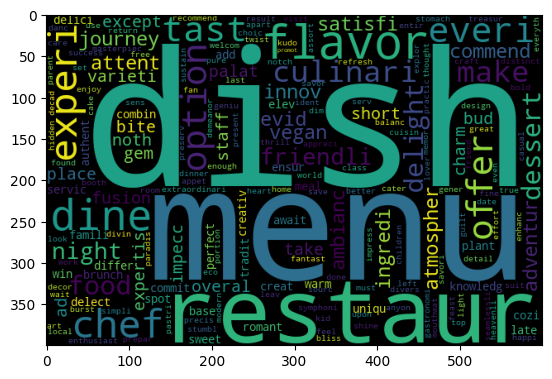

In [10]:
data = WordCloud(width = 600, height = 400).generate(text)
plt.imshow(data)

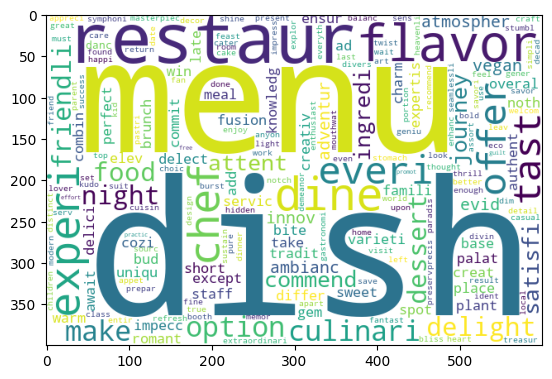

In [11]:
data = WordCloud(background_color='white',width = 600, height = 400).generate(text)
plt.imshow(data)